In [39]:
from os import listdir, makedirs, path
from sklearn import naive_bayes, metrics, feature_extraction
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Remove the "Filtered/" part of the url to use the unfiltered emails

easyhamtrain = ["./Filtered/Train/easy_ham/" + adr for adr in listdir("Train/easy_ham")]
hardhamtrain = ["./Filtered/Train/hard_ham/" + adr for adr in listdir("Train/hard_ham")]
spamtrain = ["./Filtered/Train/spam/" + adr for adr in listdir("Train/spam")]

easyhamtest = ["./Filtered/Test/easy_ham/" + adr for adr in listdir("Test/easy_ham")]
hardhamtest = ["./Filtered/Test/hard_ham/" + adr for adr in listdir("Test/hard_ham")]
spamtest =  ["./Filtered/Test/spam/" + adr for adr in listdir("Test/spam")]


In [94]:
counter = feature_extraction.text.CountVectorizer(input='filename', decode_error='ignore', max_df=0.1, min_df=2)

## training
#easy and spam
# training_labels = ["ham"]*len(easyhamtrain) + ["spam"]*len(spamtrain)
# training_count = counter.fit_transform(easyhamtrain + spamtrain)

#hard and spam
# training_labels = ["ham"]*len(hardhamtrain) + ["spam"]*len(spamtrain)
# training_count = counter.fit_transform(hardhamtrain + spamtrain)

#both and spam
training_labels = ["ham"]*(len(easyhamtrain)+len(hardhamtrain)) + ["spam"]*len(spamtrain)
training_count = counter.fit_transform(easyhamtrain + hardhamtrain + spamtrain)

vocabulary = counter.vocabulary_.keys()
print("Learned vocabulary of " + str(len(vocabulary)) + " words.")

## test
#easy and spam
# test_labels = ["ham"]*len(easyhamtest) + ["spam"]*len(spamtest)
# test_count = counter.transform(easyhamtest + spamtest)

#hard and spam
# test_labels = ["ham"]*len(hardhamtest) + ["spam"]*len(spamtest)
# test_count = counter.transform(hardhamtest + spamtest)

#both and spam
test_labels = ["ham"]*(len(easyhamtest)+len(hardhamtest)) + ["spam"]*len(spamtest)
test_count = counter.transform(easyhamtest + hardhamtest + spamtest)

Learned vocabulary of 29122 words.


In [95]:
multinomial_bayes = naive_bayes.MultinomialNB()

multinomial_bayes.fit(training_count, training_labels)
pred = multinomial_bayes.predict(test_count)

print("Multinomial bayes")
print("Accuracy:", metrics.accuracy_score(test_labels, pred)) 

Multinomial bayes
Accuracy: 0.9671882887430591


In [96]:
bernoulli_bayes = naive_bayes.BernoulliNB()

bernoulli_bayes.fit(training_count, training_labels)
pred2 = bernoulli_bayes.predict(test_count)

print("Bernoulli bayes")
print("Accuracy:", metrics.accuracy_score(test_labels, pred2)) 

Bernoulli bayes
Accuracy: 0.9177183240787481


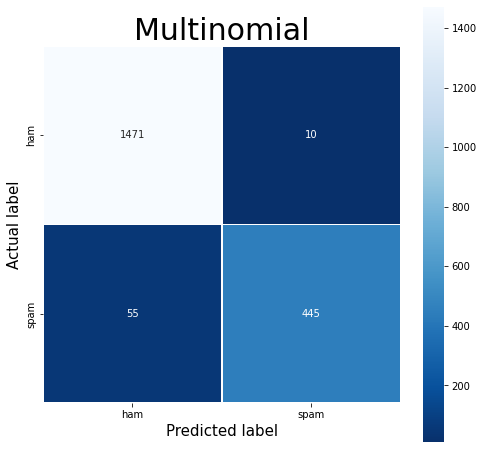

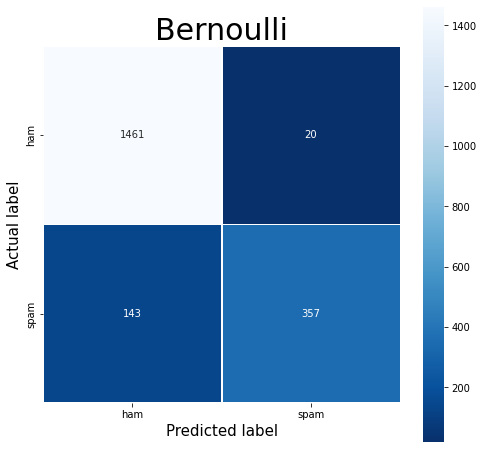

In [97]:
conf_matrix  = metrics.confusion_matrix(test_labels, pred)
 
plt.figure(figsize=(8,8)) #size in inches
sns.heatmap(conf_matrix, annot=True, linewidths=.5, fmt = 'g', square = True, cmap = 'Blues_r', xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.title("Multinomial", size=30)
plt.ylabel('Actual label', size=15)
plt.xlabel('Predicted label', size=15)    
plt.show()
plt.close()

conf_matrix  = metrics.confusion_matrix(test_labels, pred2)
 
plt.figure(figsize=(8,8)) #size in inches
sns.heatmap(conf_matrix, annot=True, linewidths=.5, fmt = 'g', square = True, cmap = 'Blues_r', xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.title("Bernoulli", size=30)
plt.ylabel('Actual label', size=15)
plt.xlabel('Predicted label', size=15)    
plt.show()
plt.close()

In [81]:
#filtering
def filter_header_footer(infile, outfile):
    makedirs(path.dirname(outfile), exist_ok=True)

    with open(infile, "r", errors="ignore") as f_in:
        with open(outfile, "w") as f_out:
            header_done = False
            for line in f_in:            
                if header_done:
                    if line.startswith("------"): #many footers have this before them
                        return #no more info to be extracted since we have reached the footer
                    f_out.write(line)                
                elif line == "" or line=="\n" or not line: #header done
                    header_done = True                
                elif line.strip()[:7].lower() == "subject": #want to include the subject line                   
                    f_out.write(line)


for fs in [easyhamtest, easyhamtrain, hardhamtest, hardhamtrain, spamtest, spamtrain]:
    for f in fs:
        filter_header_footer(f, "./Filtered" + f[1:])
